# Model Selection and Evaluation
* 1 Cross-validation: evaluating estimator performance
* 2 Tuning the hyper-parameters of an estimator
* 3 Model evaluation: quantifying the quality of predictions
* 4 Model persistence
* 5 Validation curves: plotting scores to evaluate models

## 二、Tuning the hyper-parameters of an estimator

In [ ]:
estimator.get_params() # to find the names and current values for all parameters for a given estimator

* A search consists of:
> * an estimator (regressor or classifier such as sklearn.svm.SVC());
> * a parameter space;
> * a method for searching or sampling candidates;
> * a cross-validation scheme; and
> * a score function.

* Two generic approaches to sampling search candidates are provided in scikit-learn: 
> * for given values, GridSearchCV exhaustively considers all parameter combinations
> * RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution.

### 1 Exhaustive Grid Search

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [1]:
# how a classifier is optimized by cross-validation
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.001}

Grid scores on development set:

0.986 (+/-0.016) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.959 (+/-0.029) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.982 (+/-0.026) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 10}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 100}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model 

* This example compares non-nested and nested cross-validation strategies on a classifier of the iris data set. 
> * Nested cross-validation (CV) is often used to train a model in which hyperparameters also need to be optimized. 
> * Nested CV estimates the generalization error of the underlying model and its (hyper)parameter search. 
> * Choosing the parameters that maximize non-nested CV biases the model to the dataset, yielding an overly-optimistic score.
*  nested CV effectively uses a series of train/validation/test set splits.

Automatically created module for IPython interactive environment
Average difference of 0.007742 with std. dev. of 0.007688.


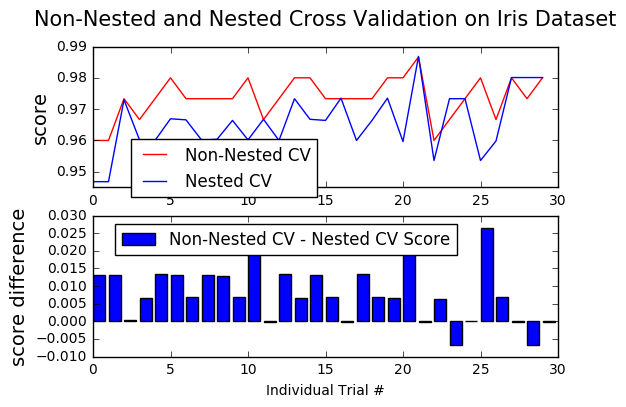

In [2]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svr = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

### 2 Randomized Parameter Optimization

In [ ]:
{'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}
#  Additionally, a computation budget, being the number of sampled candidates or sampling iterations, is specified using the n_iter parameter. 

* This has two main benefits over an exhaustive search:
> * A budget can be chosen independent of the number of parameters and possible values.
> * Adding parameters that do not influence the performance does not decrease efficiency.

* Compare randomized search and grid search for optimizing hyperparameters of a random forest. All parameters that influence the learning are searched simultaneously (except for the number of estimators, which poses a time / quality tradeoff).
* The randomized search and the grid search explore exactly the same space of parameters. The result in parameter settings is quite similar, while the run time for randomized search is drastically lower.
* The performance is slightly worse for the randomized search, though this is most likely a noise effect and would not carry over to a held-out test set.
* Note that in practice, one would not search over this many different parameters simultaneously using grid search, but pick only the ones deemed most important.

In [3]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment


ValueError: min_samples_split must be at least 2 or in (0, 1], got 1

### 3 Tips for parameter search

1. Specifying an objective metric
> * By default, parameter search uses the score function of the estimator to evaluate a parameter setting
> * These are the sklearn.metrics.accuracy_score for classification and sklearn.metrics.r2_score for regression. 
> * An alternative scoring function can be specified via the scoring parameter to GridSearchCV, RandomizedSearchCV
2. Composite estimators and parameter spaces
> * Pipeline: chaining estimators describes building composite estimators whose parameter space can be searched with these tools.
3. Model selection: development and evaluation
> * it is recommended to split the data into a development set (to be fed to the GridSearchCV instance) and an evaluation set to compute performance metrics.
4. Parallelism
> * GridSearchCV and RandomizedSearchCV evaluate each parameter setting independently. 
> * Computations can be run in parallel if your OS supports it, by using the keyword n_jobs=-1
5. Robustness to failure
> * Some parameter settings may result in a failure to fit one or more folds of the data. 
> * By default, this will cause the entire search to fail, even if some parameter settings could be fully evaluated. 
> * Setting error_score=0 (or =np.NaN) will make the procedure robust to such failure, issuing a warning and setting the score for that fold to 0 (or NaN), but completing the search.

### 4 Alternatives to brute force parameter search

#### 4.1 Model specific cross-validation
* Some models can fit data for a range of values of some parameter almost as efficiently as fitting the estimator for a single value of the parameter. This feature can be leveraged to perform a more efficient cross-validation used for model selection of this parameter.
* The most common parameter amenable to this strategy is the parameter encoding the strength of the regularizer. In this case we say that we compute the regularization path of the estimator.

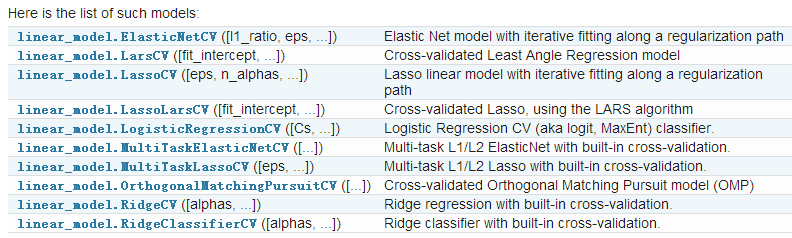

In [4]:
from IPython.display import Image
Image(filename="py35_picture\Model specific cross-validation.png")

#### 4.2 Information Criterion

* Some models can offer an information-theoretic closed-form formula of the optimal estimate of the regularization parameter by computing a single regularization path (instead of several when using cross-validation).
* Here is the list of models benefitting from the Aikike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) for automated model selection:

In [5]:
Image(filename="py35_picture\Information Criterion.png")

#### 4.3 Out of Bag Estimates

* When using ensemble methods base upon bagging, i.e. generating new training sets using sampling with replacement, part of the training set remains unused. For each classifier in the ensemble, a different part of the training set is left out.
* This left out portion can be used to estimate the generalization error without having to rely on a separate validation set. This estimate comes “for free” as no additional data is needed and can be used for model selection.

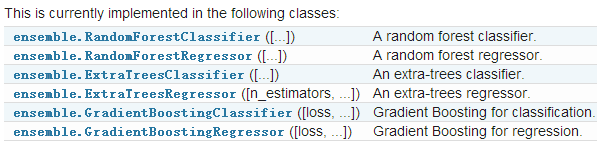

In [6]:
Image(filename="py35_picture\Out of Bag Estimates.png")